In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
telecom_data  =pd.read_csv("/content/full_data - churn-bigml-80.csv",sep=',',header=0)

In [ ]:
print(telecom_data.head())
print(telecom_data.isnull().sum())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [ ]:
telecom_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,account_length_years,internationalplan_number
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,8.422067,0.096910
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,3.318509,0.295879
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,6.166667,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,8.416667,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,10.583333,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,20.250000,1.000000


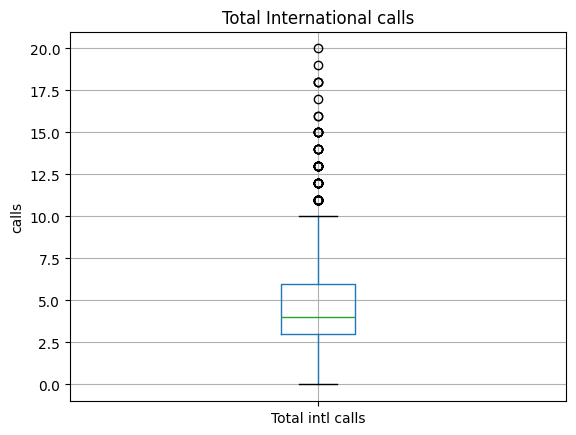

In [ ]:
telecom_data.boxplot(column='Total intl calls')

plt.title('Total International calls')

plt.ylabel('calls')


plt.show()

In [ ]:
##Making tenure into yearly instead of monthly
account_length_years = telecom_data['Account length'] / 12
telecom_data['account_length_years'] = account_length_years

In [ ]:
print(account_length_years)

0       10.666667
1        8.916667
2       11.416667
3        7.000000
4        6.250000
          ...    
3328     9.500000
3329     8.833333
3330     5.000000
3331    13.250000
3332    15.333333
Name: Account length, Length: 3333, dtype: float64


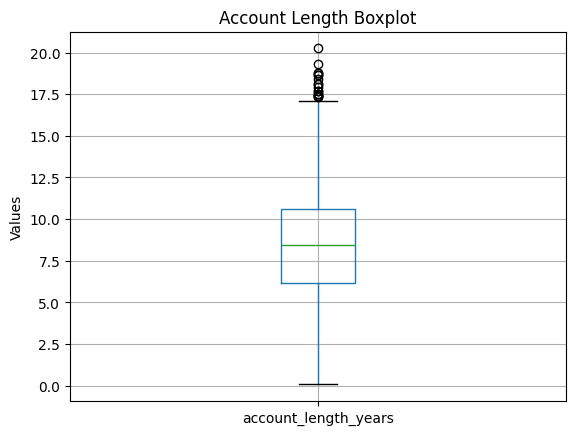

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


telecom_data.boxplot(column='account_length_years')

plt.title('Account Length Boxplot')

plt.ylabel('Values')


plt.show()

In [ ]:
telecom_data['churn_number'] = telecom_data ['Churn'].replace({'True': 1, 'False': 0})
amount_churn = (telecom_data['churn_number'].sum())
print(amount_churn)
print(amount_churn/3333*100)
pd.set_option('future.no_silent_downcasting', True)


483
14.491449144914492


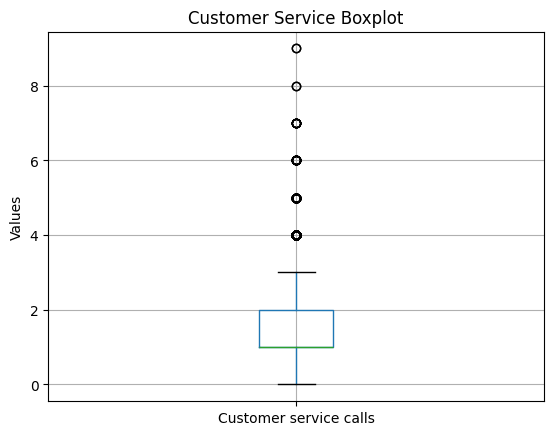

In [ ]:
telecom_data.boxplot(column='Customer service calls')

plt.title('Customer Service Boxplot')

plt.ylabel('Values')


plt.show()

In [ ]:

telecom_data['International plan'] = telecom_data['International plan'].replace({'Yes': 1, 'No': 0})
telecom_data['Voice mail plan'] = telecom_data['Voice mail plan'].replace({'Yes': 1, 'No': 0})

In [ ]:
telecom_data['Churn'] = telecom_data['Churn'].astype(int)

In [ ]:
print(telecom_data['Area code'].unique())

[415 408 510]


In [ ]:
print(telecom_data['State'].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']


State
AK     3
AL     8
AR    11
AZ     4
CA     9
CO     9
CT    12
DC     5
DE     9
FL     8
GA     8
HI     3
IA     3
ID     9
IL     5
IN     9
KS    13
KY     8
LA     4
MA    11
MD    17
ME    13
MI    16
MN    15
MO     7
MS    14
MT    14
NC    11
ND     6
NE     5
NH     9
NJ    18
NM     6
NV    14
NY    15
OH    10
OK     9
OR    11
PA     8
RI     6
SC    14
SD     8
TN     5
TX    18
UT    10
VA     5
VT     8
WA    14
WI     7
WV    10
WY     9
Name: Churn, dtype: object


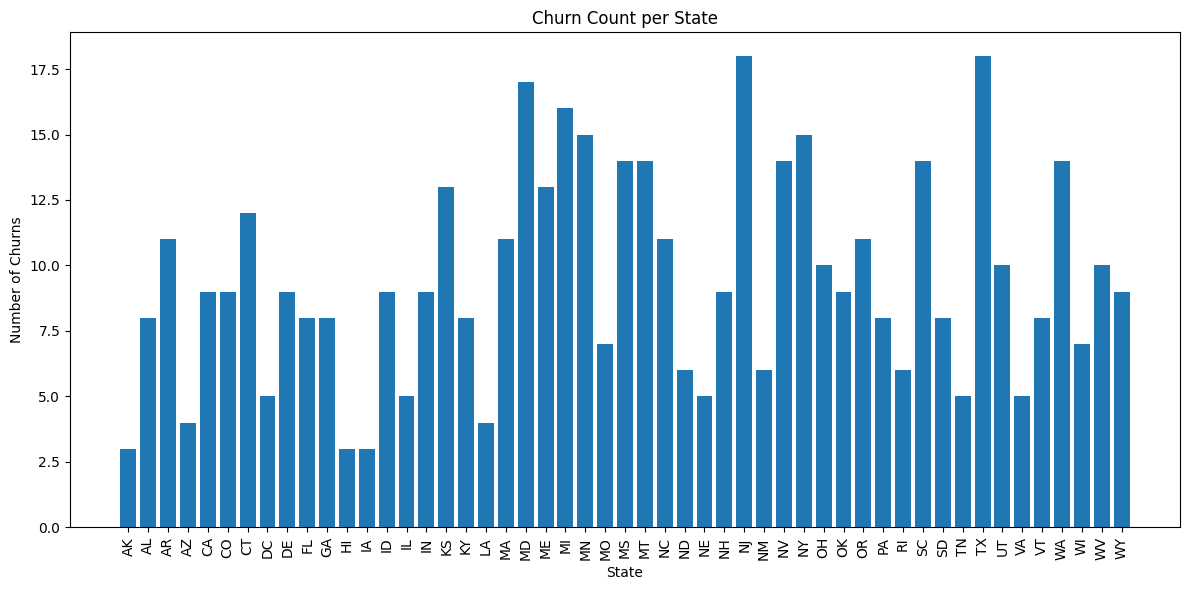

In [ ]:
churn_per_state = telecom_data.groupby('State')['Churn'].sum()
print(churn_per_state)



plt.figure(figsize=(12, 6))
plt.bar(churn_per_state.index, churn_per_state.values)


plt.xlabel('State')
plt.ylabel('Number of Churns')
plt.title('Churn Count per State')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

State
AK     81
AL    125
AR    109
AZ    102
CA     50
CO    118
CT    112
DC     73
DE     99
FL     99
GA    104
HI     82
IA     70
ID    122
IL     66
IN    120
KS     97
KY    101
LA     80
MA     79
MD    119
ME    108
MI    119
MN    130
MO     98
MS    110
MT    111
NC    106
ND     90
NE     89
NH     85
NJ    114
NM     99
NV    105
NY    142
OH    106
OK    109
OR    135
PA     57
RI     92
SC     95
SD     84
TN     70
TX    116
UT     99
VA    123
VT    127
WA    101
WI    111
WV    159
WY    111
Name: Customer service calls, dtype: int64


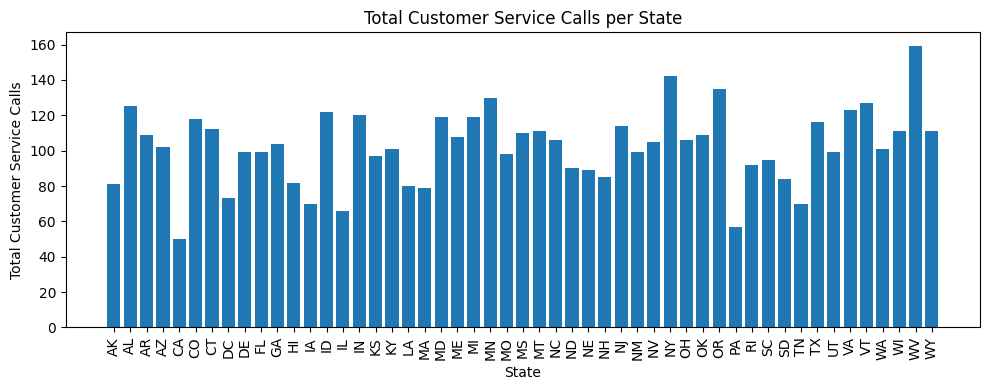

In [ ]:
customer_service_calls_per_state = telecom_data.groupby('State')['Customer service calls'].sum()
print(customer_service_calls_per_state)
plt.figure(figsize=(10, 4))
plt.bar(customer_service_calls_per_state.index, customer_service_calls_per_state.values)
plt.xlabel('State')
plt.ylabel('Total Customer Service Calls')
plt.title('Total Customer Service Calls per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

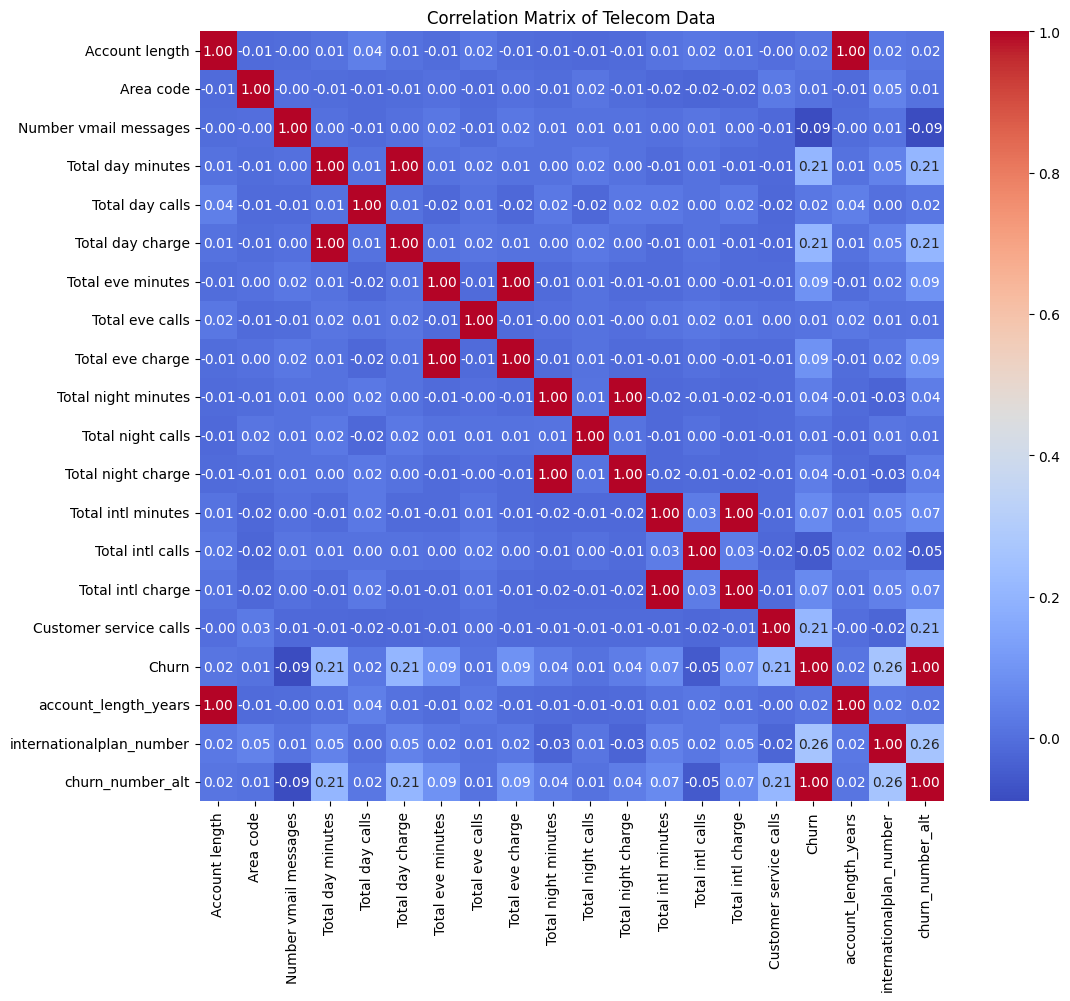

In [ ]:

correlation_matrix = telecom_data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Telecom Data')
plt.show()

In [ ]:
## Running a quick test to see which model will is preferred for this project

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

feature_cols = ['Account length', 'Total day charge','Customer service calls','Number vmail messages',  'Total day minutes','Total eve minutes', 'Total intl charge']

X = telecom_data[feature_cols]
y = telecom_data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and run LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Show model performance summary
print(models)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 390, number of negative: 2276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146287 -> initscore=-1.764028
[LightGBM] [Info] Start training from score -1.764028
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.93               0.79     0.79      0.92   
BaggingClassifier                  0.92               0.76     0.76      0.91   
XGBClassifier                      0.92               0.76     0.76      0.91   
RandomForestClassifier             0.92   

In [ ]:
##Testing a logistic Regression as baseline model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

feature_cols = ['Total day charge','Total eve minutes','Customer service calls','Number vmail messages', 'Total intl charge', 'Account length']

X = telecom_data[feature_cols]
y = telecom_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8695652173913043
Precision: 0.75
Recall: 0.0967741935483871
F1 Score: 0.17142857142857143


In [ ]:
from sklearn.ensemble import RandomForestClassifier
feature_cols = ['Total day charge','Total eve minutes','Customer service calls','Number vmail messages', 'Total intl charge', 'Account length']

X = telecom_data[feature_cols]
y = telecom_data['Churn']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
precision_rf_test = precision_score(y_test, y_pred_rf_test)
recall_rf_test = recall_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
precision_rf_train = precision_score(y_train, y_pred_rf_train)
recall_rf_train = recall_score(y_train, y_pred_rf_train)
f1_rf_train = f1_score(y_train, y_pred_rf_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)


print(f'Random Forest Test Accuracy: {accuracy_rf_test}')
print(f'Random Forest Test Precision: {precision_rf_test}')
print(f'Random Forest Test Recall: {recall_rf_test}')
print(f'Random Forest Test F1 Score: {f1_rf_test}')
print(f'Random Forest Test R-squared: {r2_rf_test}')

print(f'Random Forest Train Accuracy: {accuracy_rf_train}')
print(f'Random Forest Train Precision: {precision_rf_train}')
print(f'Random Forest Train Recall: {recall_rf_train}')
print(f'Random Forest Train F1 Score: {f1_rf_train}')
print(f'Random Forest Train R-squared: {r2_rf_train}')

Random Forest Test Accuracy: 0.9220389805097451
Random Forest Test Precision: 0.8596491228070176
Random Forest Test Recall: 0.5268817204301075
Random Forest Test F1 Score: 0.6533333333333333
Random Forest Test R-squared: 0.35026788055898994
Random Forest Train Accuracy: 1.0
Random Forest Train Precision: 1.0
Random Forest Train Recall: 1.0
Random Forest Train F1 Score: 1.0
Random Forest Train R-squared: 1.0


In [ ]:
## This is the original XGBoost tested which overfit, This isn't the final model

feature_cols = ['Total day charge','Total eve minutes','Customer service calls','Number vmail messages', 'Total intl charge', 'Account length']

X = telecom_data[feature_cols]
y = telecom_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


xgb_model.fit(X_train, y_train)

y_pred_xgb_test = xgb_model.predict(X_test)
y_pred_xgb_train = xgb_model.predict(X_train)


accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_test)
precision_xgb_test = precision_score(y_test, y_pred_xgb_test)
recall_xgb_test = recall_score(y_test, y_pred_xgb_test)
f1_xgb_test = f1_score(y_test, y_pred_xgb_test)

accuracy_xgb_train = accuracy_score(y_train, y_pred_xgb_train)
precision_xgb_train = precision_score(y_train, y_pred_xgb_train)
recall_xgb_train = recall_score(y_train, y_pred_xgb_train)
f1_xgb_train = f1_score(y_train, y_pred_xgb_train)


print("XGBoost Performance on Test Data:")
print(f'Accuracy: {accuracy_xgb_test}')
print(f'Precision: {precision_xgb_test}')
print(f'Recall: {recall_xgb_test}')
print(f'F1 Score: {f1_xgb_test}')
print("\nXGBoost Performance on Train Data:")
print(f'Accuracy: {accuracy_xgb_train}')
print(f'Precision: {precision_xgb_train}')
print(f'Recall: {recall_xgb_train}')
print(f'F1 Score: {f1_xgb_train}')

XGBoost Performance on Test Data:
Accuracy: 0.9220389805097451
Precision: 0.8253968253968254
Recall: 0.5591397849462365
F1 Score: 0.6666666666666666

XGBoost Performance on Train Data:
Accuracy: 0.994748687171793
Precision: 1.0
Recall: 0.9641025641025641
F1 Score: 0.9817232375979112


In [ ]:
##Although there isnt much data, I wanted to try a neural network to see how it would preform
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

feature_cols = ['Account length', 'Total day charge',  'Total day minutes','Total eve minutes', 'Total intl charge']
X = telecom_data[feature_cols]
y = telecom_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=12, batch_size=30, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Neural Network Accuracy: {accuracy}')

# Predict probabilities and convert to binary predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Neural Network Precision: {precision}')
print(f'Neural Network Recall: {recall}')
print(f'Neural Network F1 Score: {f1}')

Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7741 - loss: 2.4716
Epoch 2/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8385 - loss: 0.4687
Epoch 3/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8143 - loss: 0.5585
Epoch 4/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8310 - loss: 0.5193
Epoch 5/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8239 - loss: 0.4931
Epoch 6/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8245 - loss: 0.5207
Epoch 7/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8235 - loss: 0.4923
Epoch 8/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.4617
Epoch 9/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8242 - loss: 0.5006
Epoch 10/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8087 - loss: 0.5330
Epoch 11/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8312 - loss: 0.4835
Epoch 12/12
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8404 - loss: 0.4864


In [ ]:
!pip install shap

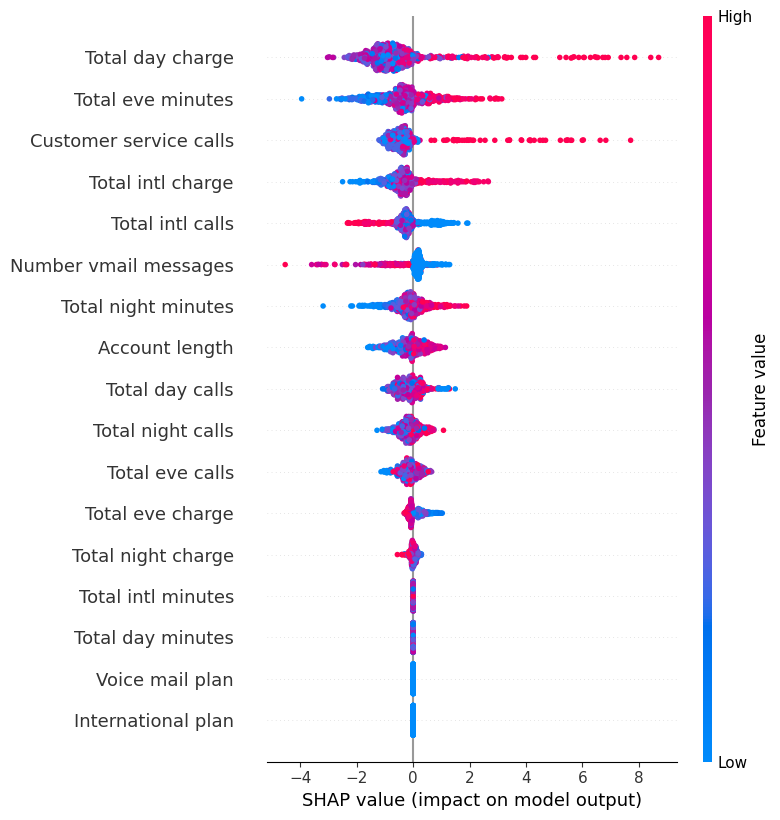

In [ ]:
##Getting to understand how the predictors effect the model
import shap

explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test, feature_names=feature_cols)

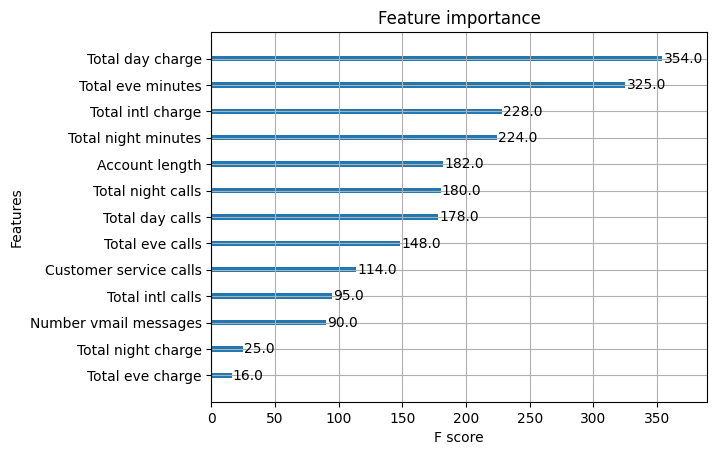

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


plot_importance(xgb_model)
plt.show()

In [ ]:
##To reduce overfitting, I used Randomized search to get the best peramitters
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 10]
}


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


random_search = RandomizedSearchCV(xgb_model, param_grid, cv=5, n_iter=50, scoring='accuracy', random_state=42, n_jobs=-1)


random_search.fit(X_train, y_train)


print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

best_xgb_model = random_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:14:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'subsample': 0.6, 'reg_lambda': 0.001, 'reg_alpha': 0.001, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best accuracy found:  0.9231057332180927


In [ ]:

best_params = random_search.best_params_

tuned_xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **best_params)


tuned_xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:29:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
##New XGBoost model with results from Randomized Search
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred_tuned_test = tuned_xgb_model.predict(X_test)


accuracy_tuned_test = accuracy_score(y_test, y_pred_tuned_test)
precision_tuned_test = precision_score(y_test, y_pred_tuned_test)
recall_tuned_test = recall_score(y_test, y_pred_tuned_test)
f1_tuned_test = f1_score(y_test, y_pred_tuned_test)


y_pred_tuned_train = tuned_xgb_model.predict(X_train)


accuracy_tuned_train = accuracy_score(y_train, y_pred_tuned_train)
precision_tuned_train = precision_score(y_train, y_pred_tuned_train)
recall_tuned_train = recall_score(y_train, y_pred_tuned_train)
f1_tuned_train = f1_score(y_train, y_pred_tuned_train)

print("Tuned XGBoost Performance on Test Data:")
print(f'Accuracy: {accuracy_tuned_test}')
print(f'Precision: {precision_tuned_test}')
print(f'Recall: {recall_tuned_test}')
print(f'F1 Score: {f1_tuned_test}')

print("\nTuned XGBoost Performance on Train Data:")
print(f'Accuracy: {accuracy_tuned_train}')
print(f'Precision: {precision_tuned_train}')
print(f'Recall: {recall_tuned_train}')
print(f'F1 Score: {f1_tuned_train}')

Tuned XGBoost Performance on Test Data:
Accuracy: 0.9220389805097451
Precision: 0.8727272727272727
Recall: 0.5161290322580645
F1 Score: 0.6486486486486487

Tuned XGBoost Performance on Train Data:
Accuracy: 0.9362340585146287
Precision: 0.9435483870967742
Recall: 0.6
F1 Score: 0.7335423197492164


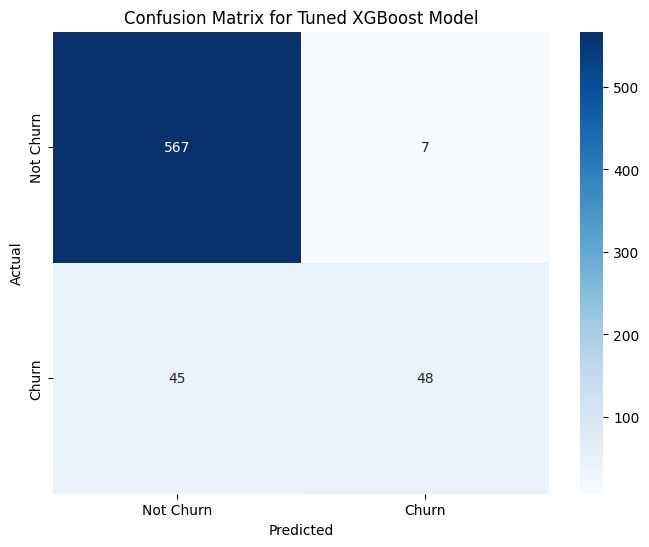

In [ ]:
##Looking at the performance of model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned_test)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned XGBoost Model')
plt.show()

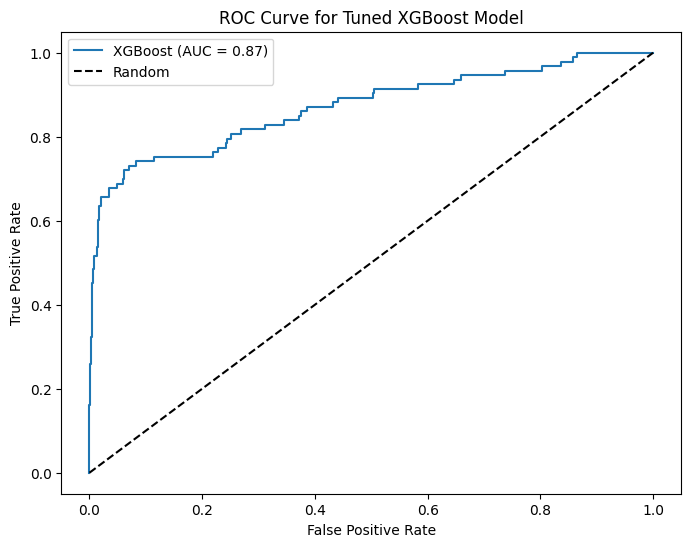

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_pred_prob_tuned = tuned_xgb_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)


auc = roc_auc_score(y_test, y_pred_prob_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned XGBoost Model')
plt.legend()
plt.show()

In [52]:
import json
with open("/content/capstone_final_project.ipynb") as f:
    nb = json.load(f)
if 'widgets' in nb.get('metadata', {}):
    del nb['metadata']['widgets']
for cell in nb.get('cells', []):
    if 'widgets' in cell.get('metadata', {}):
        del cell['metadata']['widgets']
with open("notebook_cleaned.ipynb", "w") as f:
    json.dump(nb, f, indent=2)